In [78]:
import numpy as np
import pretty_midi
import glob

import seaborn as sns

In [ ]:
midi_paths = glob.glob("MIDI/*.mid")
waltzes = [f for f in midi_paths if 'waltzes' in f]
ashovers = [f for f in midi_paths if 'ashover' in f]
waltz_objects = [pretty_midi.PrettyMIDI(path) for path in waltzes]
ashover_objects = [pretty_midi.PrettyMIDI(path) for path in ashovers]

c:\Users\ericy\anaconda3\envs\180b-example\Lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning:

Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.



In [69]:
waltz_tempos = [mid_obj.estimate_tempo() for mid_obj in waltz_objects]
ashover_tempos = [mid_obj.estimate_tempo() for mid_obj in ashover_objects]

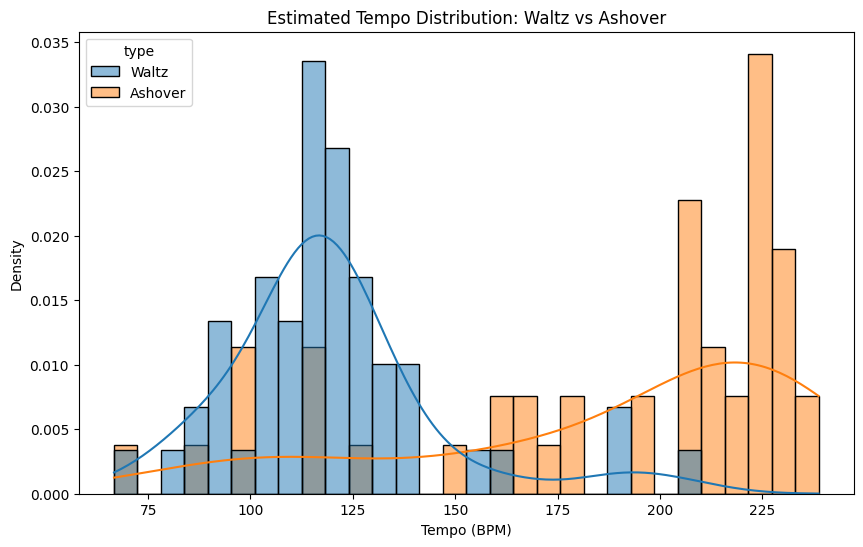

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

tempo_data = pd.DataFrame({
    'tempo': waltz_tempos + ashover_tempos,
    'type': ['Waltz'] * len(waltz_tempos) + ['Ashover'] * len(ashover_tempos)
})

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=tempo_data, x='tempo', hue='type', kde=True, bins=30, stat='density', common_norm=False)
plt.title('Estimated Tempo Distribution: Waltz vs Ashover')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Density')
plt.show()

In [73]:
def get_pitch_distribution(mid_obj):
    pitches = []
    for instrument in mid_obj.instruments:
        if not instrument.is_drum:
            pitches += [note.pitch for note in instrument.notes]
    return pitches

In [75]:
waltz_pitch_distributions = [get_pitch_distribution(mid_obj) for mid_obj in waltz_objects]
ashover_pitch_distributions = [get_pitch_distribution(mid_obj) for mid_obj in ashover_objects]

[TimeSignature(numerator=4, denominator=4, time=0.0)]